In [81]:
!python3 main.py -dir "cifar_test" -ds "cifar" -e 3 -m 1 -type entropy -so 3 -coeff 100.0

2023-11-02 11:44:01.403185: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /lsf/10.1/linux3.10-glibc2.17-x86_64/lib
2023-11-02 11:44:01.403223: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-02 11:44:06.693213: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-11-02 11:44:06.693903: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /lsf/10.1/linux3.10-glibc2.17-x86_64/lib
2023-11-02 11:44:06.693924: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-02 11

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [84]:
coefficients = [10.0]
# 0.0, 1.0
# 0.0, 1.0, 10000.0
# 0.0, 1000.0, 10000.0, 1000000.0,100000000.0
# 0.0, 1e-3, 1e-2, 1e-1, 0.5, 1.0, 5.0, 10.0, 100.0, 1000.0

# "entropy", "sparsity"
regularization_type = "entropy"
directory_path = "results/mtest"
custom_colors = ['Red', 'Green', 'Blue', 'Purple', 'Orange', 'Cyan', 'Pink', 'Yellow', 'Magenta', 'Lime']


# Create a custom colormap
cmap = ListedColormap(custom_colors)

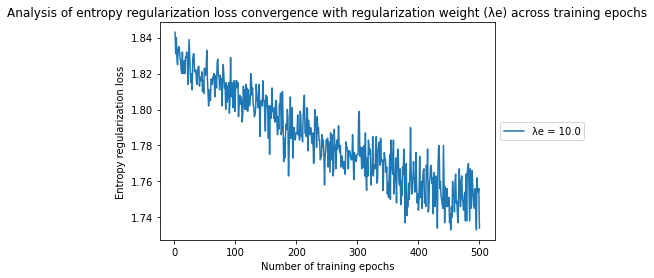

In [85]:
# regularization loss

reg_loss_file_path = f"{directory_path}/loss_logs.txt"

y = []

with open(reg_loss_file_path, "r") as file:
    lines = file.readlines()

    for line in lines:
        line = line.strip()  # Remove the '\n' character
        values = [float(value) for value in line.split(',')]  # Split by ',' and convert to float
        y.append(values)  # Add the list of values to your 'y' list
        
epochs = list(range(1, len(y[0]) + 1))


# Create a line graph for y
for i, coeff in enumerate(coefficients):
    label = f'λe = {coeff}'
    plt.plot(epochs, y[i], label=label)

# Add labels and an updated title
plt.xlabel('Number of training epochs')
plt.ylabel(f'{regularization_type.capitalize()} regularization loss')
plt.title(f'Analysis of {regularization_type} regularization loss convergence with regularization weight (λe) across training epochs')

# Add a legend to differentiate between the line and dots
# Place the legend to the right of the plot
plt.legend(labels=[f'λe = {coeff}' for coeff in coefficients], loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend()

image_path = f"{directory_path}/regularization_loss_convergence.png"
plt.savefig(image_path)

# Show the graph
plt.show()


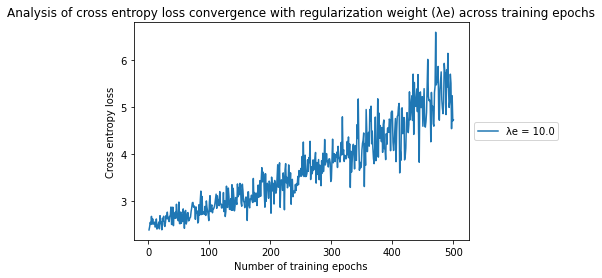

In [86]:
# cross entropy loss
ce_loss_file_path = f"{directory_path}/ce_logs.txt"

y = []

with open(ce_loss_file_path, "r") as file:
    lines = file.readlines()

    for line in lines:
        line = line.strip()  # Remove the '\n' character
        values = [float(value) for value in line.split(',')]  # Split by ',' and convert to float
        y.append(values)  # Add the list of values to your 'y' list
        
epochs = list(range(1, len(y[0]) + 1))


# Create a line graph for y
for i, coeff in enumerate(coefficients):
    label = f'λe = {coeff}'
    plt.plot(epochs, y[i], label=label)

# Add labels and an updated title
plt.xlabel('Number of training epochs')
plt.ylabel(f'Cross entropy loss')
plt.title(f'Analysis of cross entropy loss convergence with regularization weight (λe) across training epochs')

# Add a legend to differentiate between the line and dots
# Place the legend to the right of the plot
plt.legend(labels=[f'λe = {coeff}' for coeff in coefficients], loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend()

image_path = f"{directory_path}/cross_entropy_loss_convergence.png"
plt.savefig(image_path)

# Show the graph
plt.show()


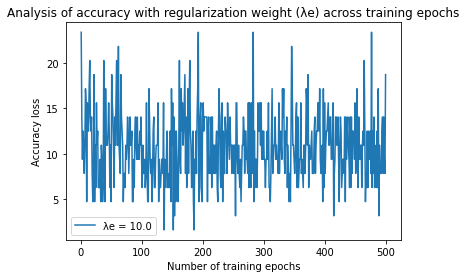

In [87]:
# accuracy logs
acc_loss_file_path = f"{directory_path}/accuracy_logs.txt"

y = []
with open(acc_loss_file_path, "r") as file:
    lines = file.readlines()

    for line in lines:
        line = line.strip()  # Remove the '\n' character
        values = [float(value) for value in line.split(',')]  # Split by ',' and convert to float
        y.append(values)  # Add the list of values to your 'y' list
        
epochs = list(range(1, len(y[0]) + 1))

# Create a line graph for y
for i, coeff in enumerate(coefficients):
    label = f'λe = {coeff}'
    plt.plot(epochs, y[i], label=label)

# Add labels and an updated title
plt.xlabel('Number of training epochs')
plt.ylabel(f'Accuracy loss')
plt.title(f'Analysis of accuracy with regularization weight (λe) across training epochs')

# Add a legend to differentiate between the line and dots
plt.legend()

image_path = f"{directory_path}/accuracy_convergence.png"
plt.savefig(image_path)

# Show the graph
plt.show()


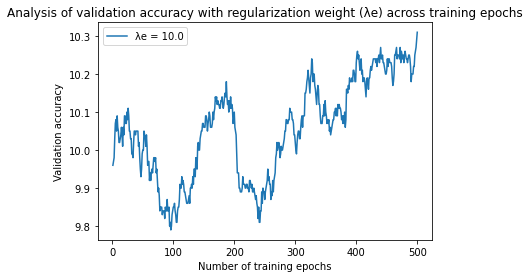

In [88]:
# val_accuracy logs
val_file_path = f"{directory_path}/val_accuracy_logs.txt"

y = []
with open(val_file_path, "r") as file:
    lines = file.readlines()

    for line in lines:
        line = line.strip()  # Remove the '\n' character
        values = [float(value) for value in line.split(',')]  # Split by ',' and convert to float
        y.append(values)  # Add the list of values to your 'y' list

epochs = list(range(1, len(y[0]) + 1))

# Create a line graph for y
for i, coeff in enumerate(coefficients):
    label = f'λe = {coeff}'
    plt.plot(epochs, y[i], label=label)

# Add labels and an updated title
plt.xlabel('Number of training epochs')
plt.ylabel(f'Validation accuracy')
plt.title(f'Analysis of validation accuracy with regularization weight (λe) across training epochs')

# Add a legend to differentiate between the line and dots

plt.legend()

image_path = f"{directory_path}/validation_accuracy_convergence.png"
plt.savefig(image_path)

# Show the graph
plt.show()


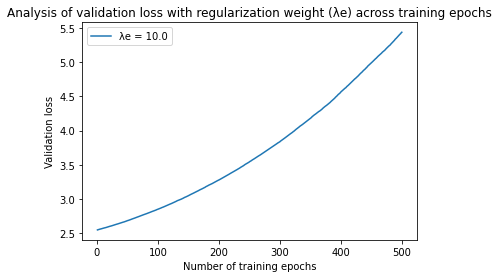

In [89]:
# val_loss logs
val_file_path = f"{directory_path}/val_loss_logs.txt"

y = []
with open(val_file_path, "r") as file:
    lines = file.readlines()

    for line in lines:
        line = line.strip()  # Remove the '\n' character
        values = [float(value) for value in line.split(',')]  # Split by ',' and convert to float
        y.append(values)  # Add the list of values to your 'y' list

epochs = list(range(1, len(y[0]) + 1))

# Create a line graph for y
for i, coeff in enumerate(coefficients):
    label = f'λe = {coeff}'
    plt.plot(epochs, y[i], label=label)

# Add labels and an updated title
plt.xlabel('Number of training epochs')
plt.ylabel(f'Validation loss')
plt.title(f'Analysis of validation loss with regularization weight (λe) across training epochs')

# Add a legend to differentiate between the line and dots
plt.legend()

image_path = f"{directory_path}/validation_loss_convergence.png"
plt.savefig(image_path)

# Show the graph
plt.show()


In [53]:
acc

[[45.84, 57.45, 49.44]]

Accuracy difference with original 
Model size difference with original 


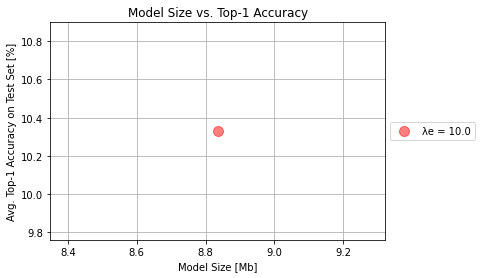

In [90]:
# model size vs top 1 accuracy 

# Data
accuracy_file_path = f"{directory_path}/accuracy.txt"
weights_size_file_path = f"{directory_path}/weights_size.txt"

acc = []
w_size = []


with open(accuracy_file_path, "r") as file:
    lines = file.readlines()

    for line in lines:
        line = line.strip()  # Remove the '\n' character
        values = [float(value) for value in line.strip().split(',')]  # Split by ',' and convert to float
        acc = values
    

with open(weights_size_file_path, "r") as file:
    lines = file.readlines()

    for line in lines:
        line = line.strip()  # Remove the '\n' character
        values = [float(value) for value in line.strip().split(',')]  # Split by ',' and convert to float
        w_size = values
    
w_size = [num / 1024.0 / 1024.0 for num in w_size]    
length_of_coefficient = len(coefficients)

print("Accuracy difference with original ")
for i in range(length_of_coefficient - 1):
    percent_diff = ((acc[i+1] - acc[0]) / acc[0]) * 100
    print(f"{percent_diff:.2f}%")
    
print("Model size difference with original ")
for i in range(length_of_coefficient - 1):
    percent_diff = ((w_size[i+1] - w_size[0]) / w_size[0]) * 100
    print(f"{percent_diff:.2f}%")

dot_size = 100  # Adjust the dot size as needed

for idx, r in enumerate(coefficients):
    plt.scatter([w_size[idx]], [acc[idx]], marker='o', color=cmap(idx), label=f'λe = {r}', alpha=0.5, s=dot_size)

# Additional plot settings
plt.title('Model Size vs. Top-1 Accuracy')
plt.xlabel('Model Size [Mb]')
plt.ylabel('Avg. Top-1 Accuracy on Test Set [%]')
# Place the legend to the right of the plot
plt.legend(labels=[f'λe = {coeff}' for coeff in coefficients], loc='center left', bbox_to_anchor=(1, 0.5))

#plt.legend()
plt.grid(True)

image_path = f"{directory_path}/size_accuracy.png"
plt.savefig(image_path)

plt.show()
